# Importing required libraries

In [1]:
from dateutil.parser import parse 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import scipy.stats as sp

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Importing the dataset

In [2]:
# Fetching the data
data = pd.read_csv('Brent Spot Price.csv')
data.head()

,Unnamed: 0,"Brent crude oil spot price, Monthly (dollars per barrel)"
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352


# EDA and Preprocessing the Data

In [3]:
# Changing column names
data.columns = ['Date','Price']
data.tail()
# Data is from Jan 1990 to Dec 2022
# We have 33 years data

,Date,Price
391,2022 08,60.0
392,2022 09,60.0
393,2022 10,61.0
394,2022 11,61.0
395,2022 12,61.0


In [4]:
# Checking data types of the columns as date format is different
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    396 non-null    object 
 1   Price   396 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [38]:
data.describe()

,Price,year
count,396.000000,396.00000
mean,49.661245,2006.00000
std,31.566252,9.53395
min,9.824000,1990.00000
25%,20.254750,1998.00000
50%,44.737000,2006.00000
75%,67.236500,2014.00000
max,132.718000,2022.00000


In [5]:
# Correcting date format
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)
data.head()

,Date,Price
0,1990-01-01,21.251
1,1990-02-01,19.813
2,1990-03-01,18.387
3,1990-04-01,16.612
4,1990-05-01,16.352


'The high rates of unemployment caused by the Great Recession have remained persistently high in recent periods. \nAt the same time, oil prices rose significantly mainly as a result of the increase in demand from China and India.\n\nThe 2008 financial crisis and Great Recession induced a bear market in oil and gas, sending the price of a barrel \nof crude oil from nearly $150 to $35 in just a few months. \nThe recession led to a general drop in asset prices around the world as credit contracted and earnings projections fell.'

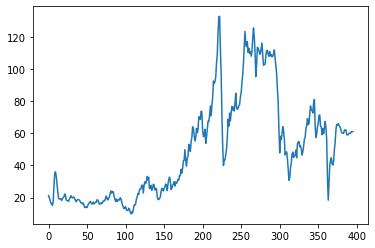

In [6]:
plt.plot(data['Price'])
#plt.plot(data['Price'].ewm(span=15).mean())

'''The high rates of unemployment caused by the Great Recession have remained persistently high in recent periods. 
At the same time, oil prices rose significantly mainly as a result of the increase in demand from China and India.

The 2008 financial crisis and Great Recession induced a bear market in oil and gas, sending the price of a barrel 
of crude oil from nearly $150 to $35 in just a few months. 
The recession led to a general drop in asset prices around the world as credit contracted and earnings projections fell.'''

In [7]:
# Smoothning the Data
#data['Price'] = data['Price'].ewm(span=15).mean()

In [8]:
# Setting the Date column as the index
data = data.set_index('Date')
data

,Price
Date,
1990-01-01,21.251
1990-02-01,19.813
1990-03-01,18.387
1990-04-01,16.612
1990-05-01,16.352
...,...
2022-08-01,60.000
2022-09-01,60.000
2022-10-01,61.000


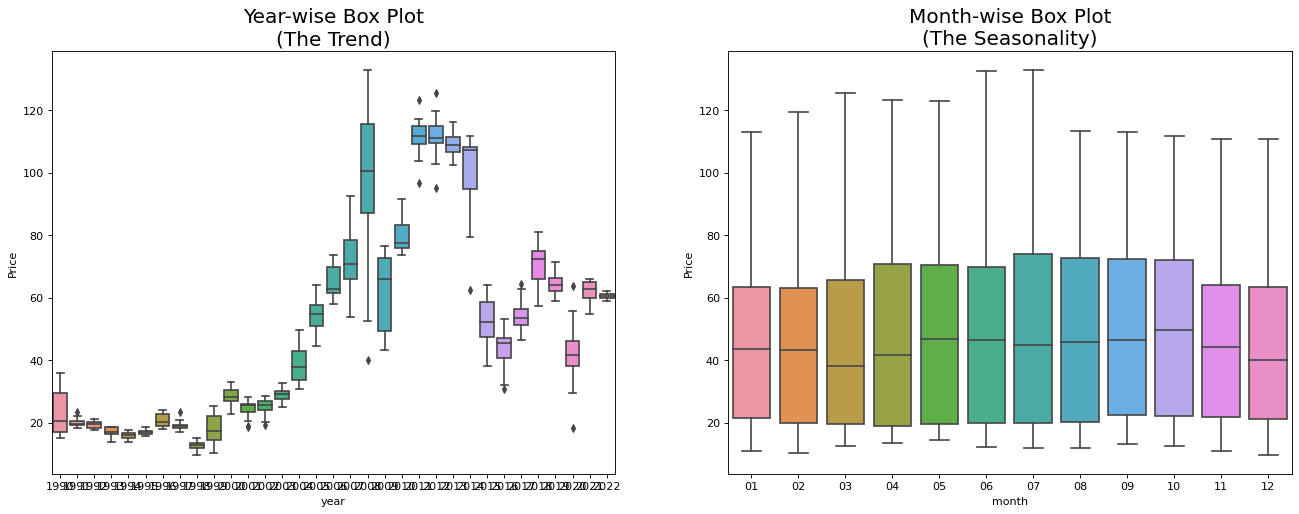

In [9]:
# Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution
# Prepare data
data = data.reset_index()
df = data
df['year'] = [d.year for d in data.Date]
df['month'] = [d.strftime('%m') for d in data.Date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price', data=df, ax=axes[0])
sns.boxplot(x='month', y='Price', data=df.loc[~df.year.isin([1990, 2022]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# There seems to be a trend the data but no seasonality

# Splitting the Data into train and test

In [10]:
train = data.iloc[:int(0.7*len(data))-1,:]
test = data.iloc[int(0.7*len(data))-1:,:]

In [11]:
train

,Date,Price,year,month
0,1990-01-01,21.251,1990,01
1,1990-02-01,19.813,1990,02
2,1990-03-01,18.387,1990,03
3,1990-04-01,16.612,1990,04
4,1990-05-01,16.352,1990,05
...,...,...,...,...
271,2012-08-01,113.356,2012,08
272,2012-09-01,112.864,2012,09
273,2012-10-01,111.711,2012,10
274,2012-11-01,109.059,2012,11


In [12]:
test

,Date,Price,year,month
276,2013-01-01,112.960,2013,01
277,2013-02-01,116.051,2013,02
278,2013-03-01,108.474,2013,03
279,2013-04-01,102.248,2013,04
280,2013-05-01,102.559,2013,05
...,...,...,...,...
391,2022-08-01,60.000,2022,08
392,2022-09-01,60.000,2022,09
393,2022-10-01,61.000,2022,10
394,2022-11-01,61.000,2022,11


# Checking the trend and seasonal decompose of the train data

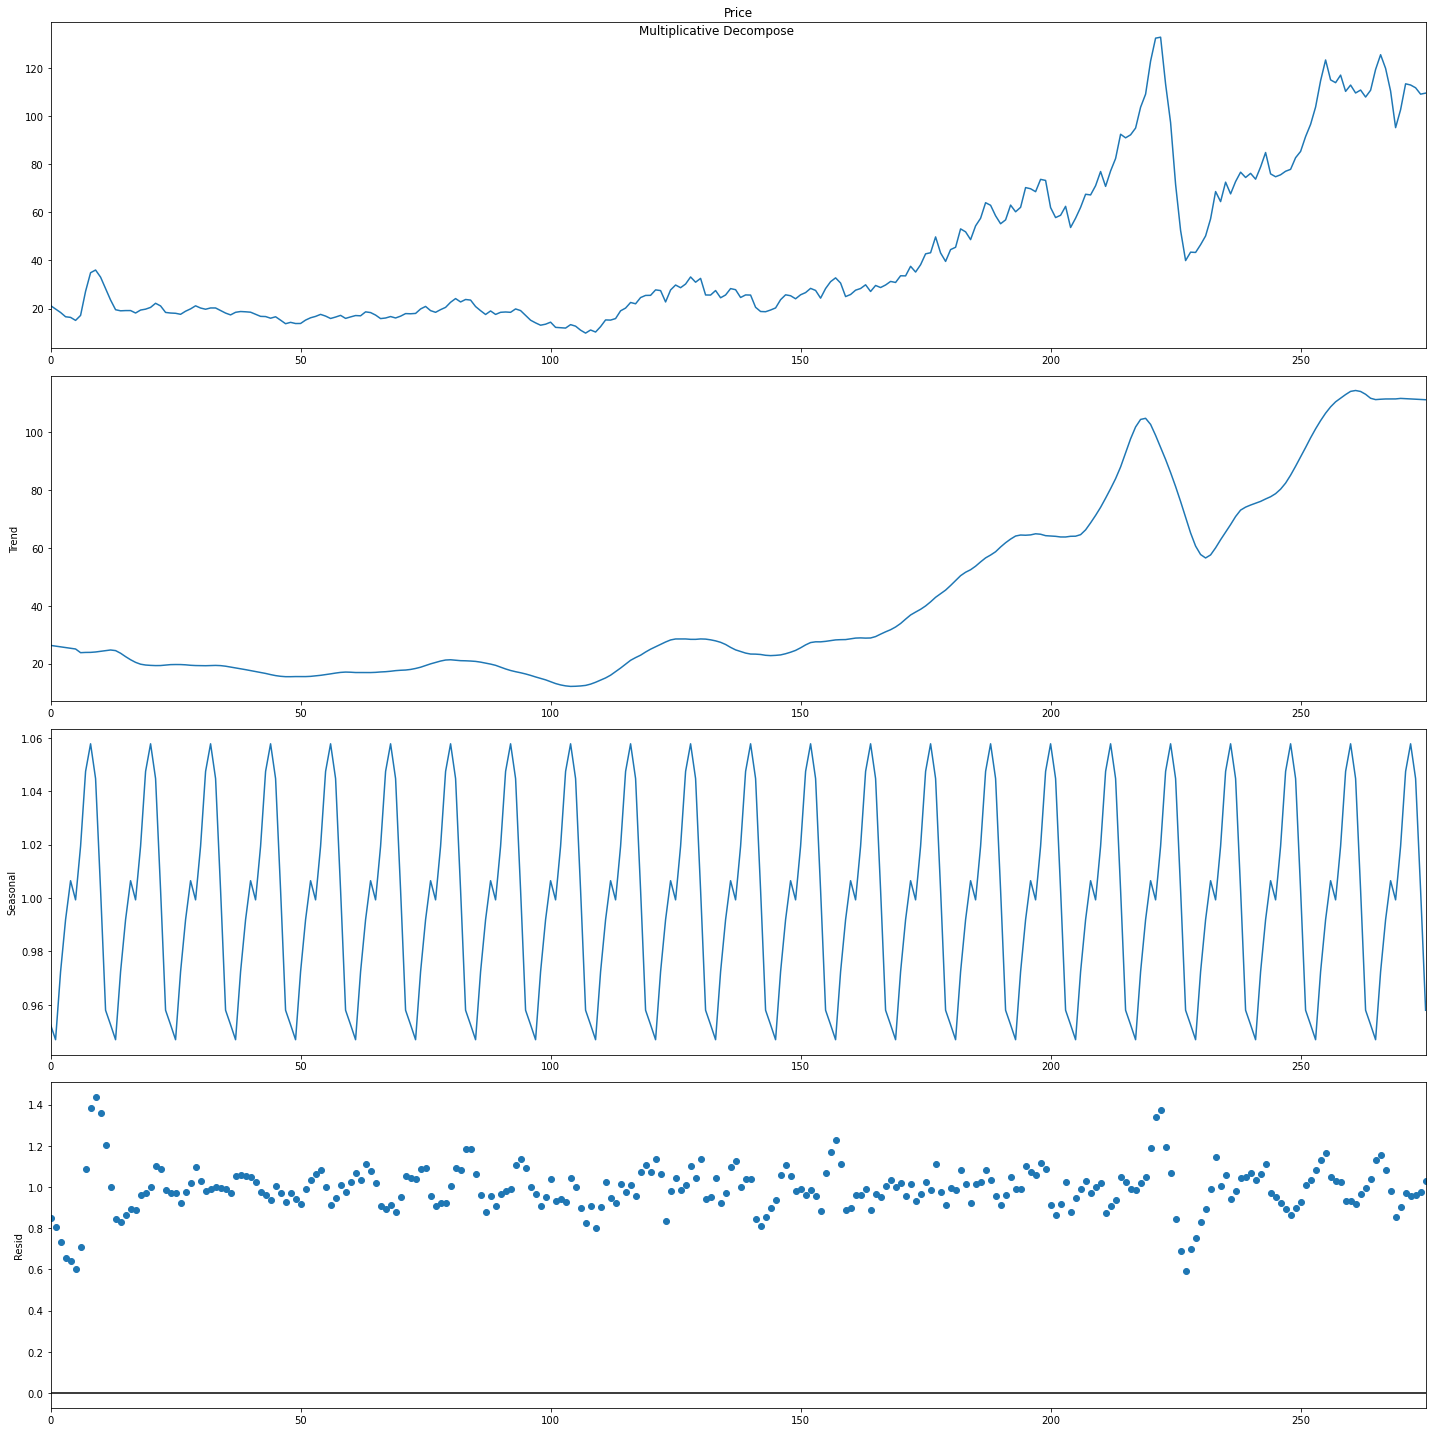

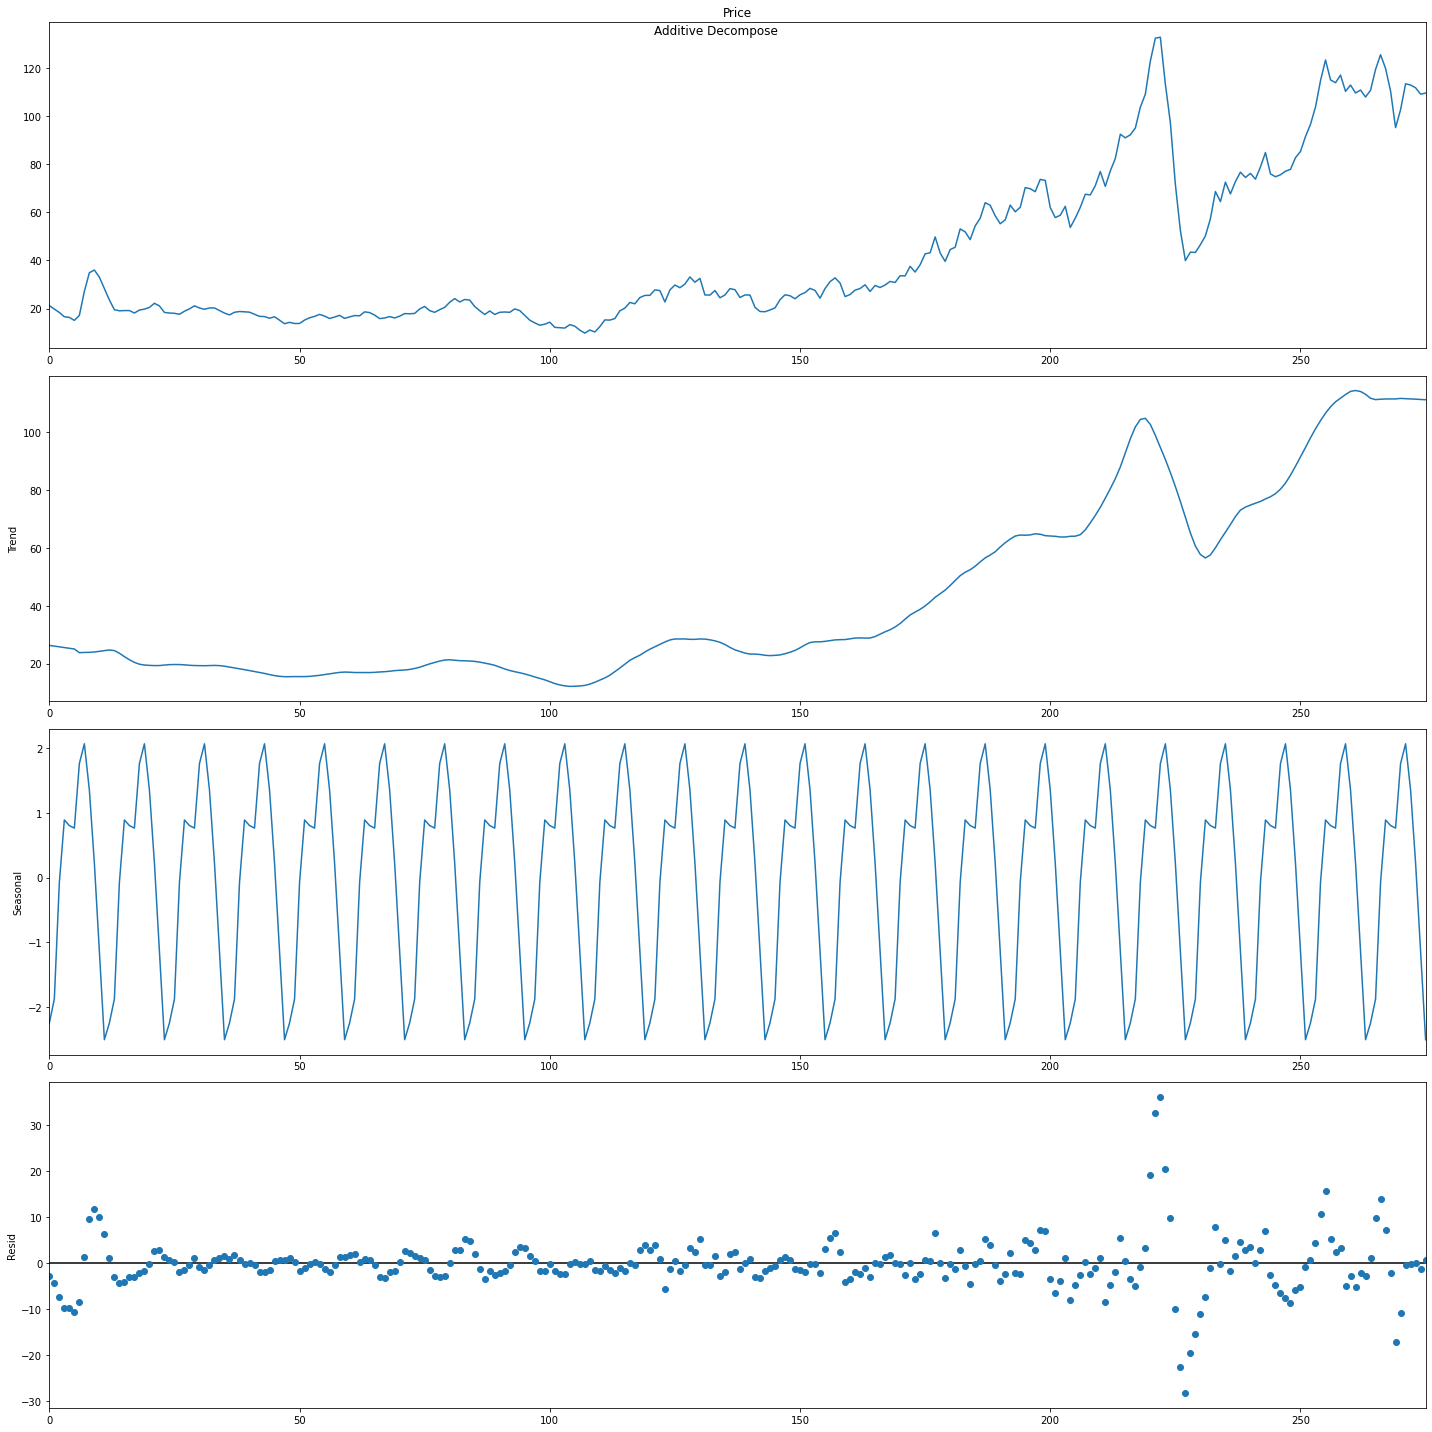

In [13]:
# Additive and multiplicative time series
# Decomposing data into additive and multiplicative components

# Multiplicative Decomposition 
result_mul = seasonal_decompose(train['Price'], period = 12, model='multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
result_add = seasonal_decompose(train['Price'], period = 12, model='additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_add.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()

# Since the residuals are better correlated in the multiplicative decompose, we can say that the data
# follows a multiplication decompose and contains both a yearly seasonal and trend element

In [14]:
# Multiplicative components
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed['product'] = df_reconstructed['seas']*df_reconstructed['trend']*df_reconstructed['resid']
df_reconstructed.head()

,seas,trend,resid,actual_values,product
0,0.952562,26.289564,0.848599,21.251,21.251
1,0.946959,26.040875,0.803459,19.813,19.813
2,0.972422,25.792187,0.733108,18.387,18.387
3,0.991919,25.543498,0.655640,16.612,16.612
4,1.006499,25.294810,0.642282,16.352,16.352


# ADF and KPSS Test

In [15]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(train.Price.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence accept null hypothesis, data is not stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(train.Price.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence reject null hypothesis, data is not stationary

ADF Statistic: 0.22608077218162262
p-value: 0.9736870285642156
Critial Values:
   1%, -3.455558114028747
Critial Values:
   5%, -2.872635586277424
Critial Values:
   10%, -2.572682677000175

KPSS Statistic: 1.402985
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# De-trending the data

**Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.**  
  
- Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.  
- Subtract the trend component obtained from time series decomposition we saw earlier.  
  
- Subtract the mean  
  
- Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

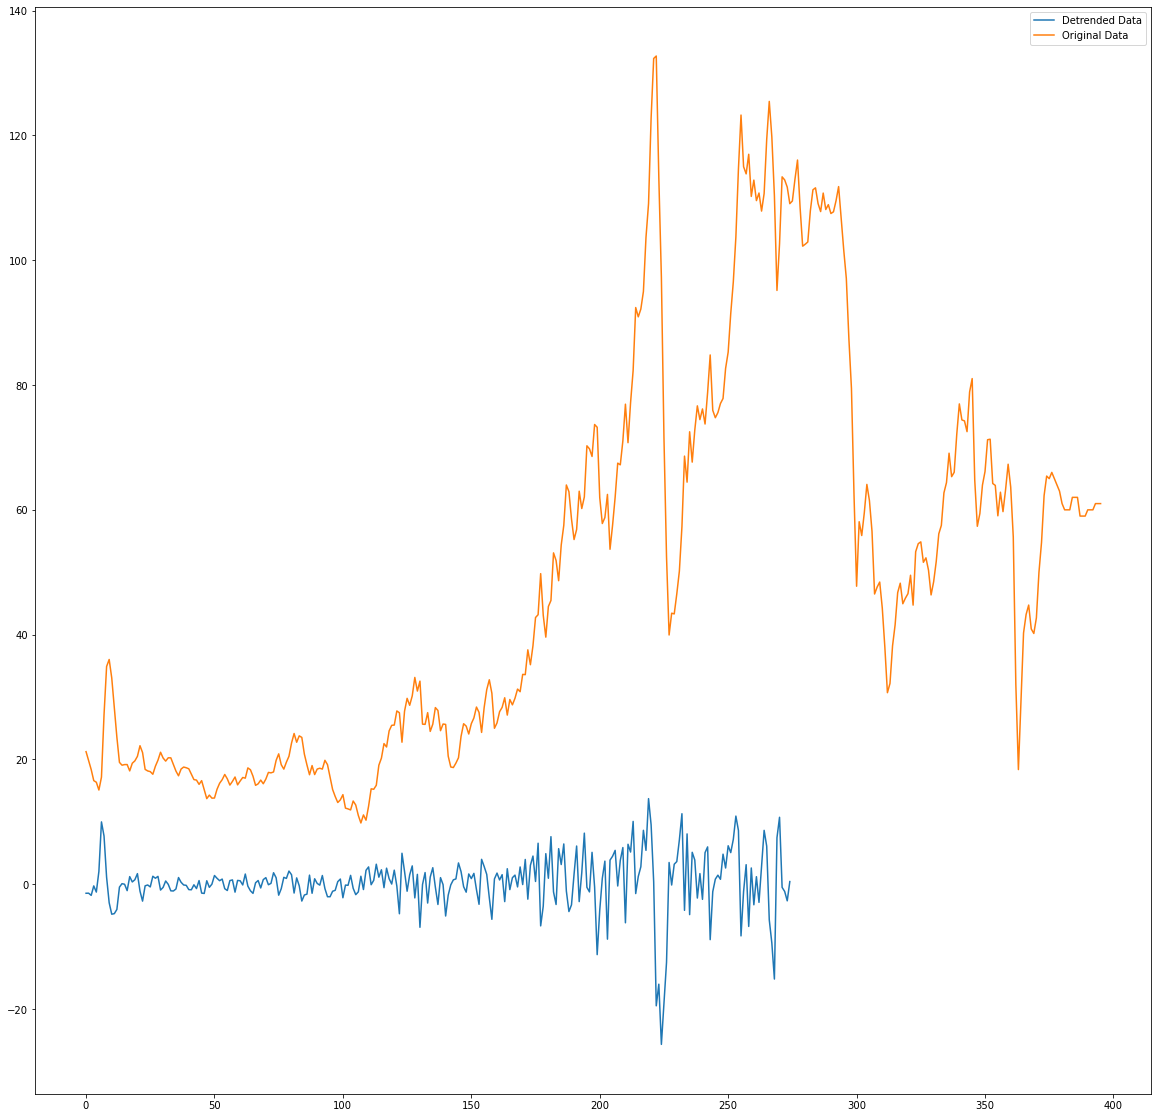

In [16]:
# Given data follows a stochastic trend that is increase and decrease in values does not follow a consistent pattern

# Detrending using difference method
#create a differenced series
def difference(dataset,interval=1):
    diff=list()
    for i in range(interval,len(dataset)):
        value=dataset[i]-dataset[i-interval]
        diff.append(value)
    return (diff)

df_detrend=difference(train['Price'])

plt.plot(df_detrend,label = 'Detrended Data')
plt.plot(data.Price.values,label='Original Data')
#plt.plot(pd.DataFrame(df_detrend.values).ewm(span=15).mean(),label='EWM')
plt.legend()

In [17]:
# Testing for stationarity on detrended data
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(df_detrend, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence accept null hypothesis, data is stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(df_detrend, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence reject null hypothesis, data is stationary

ADF Statistic: -5.9756734807701575
p-value: 1.8901031462006946e-07
Critial Values:
   1%, -3.455558114028747
Critial Values:
   5%, -2.872635586277424
Critial Values:
   10%, -2.572682677000175

KPSS Statistic: 0.152278
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


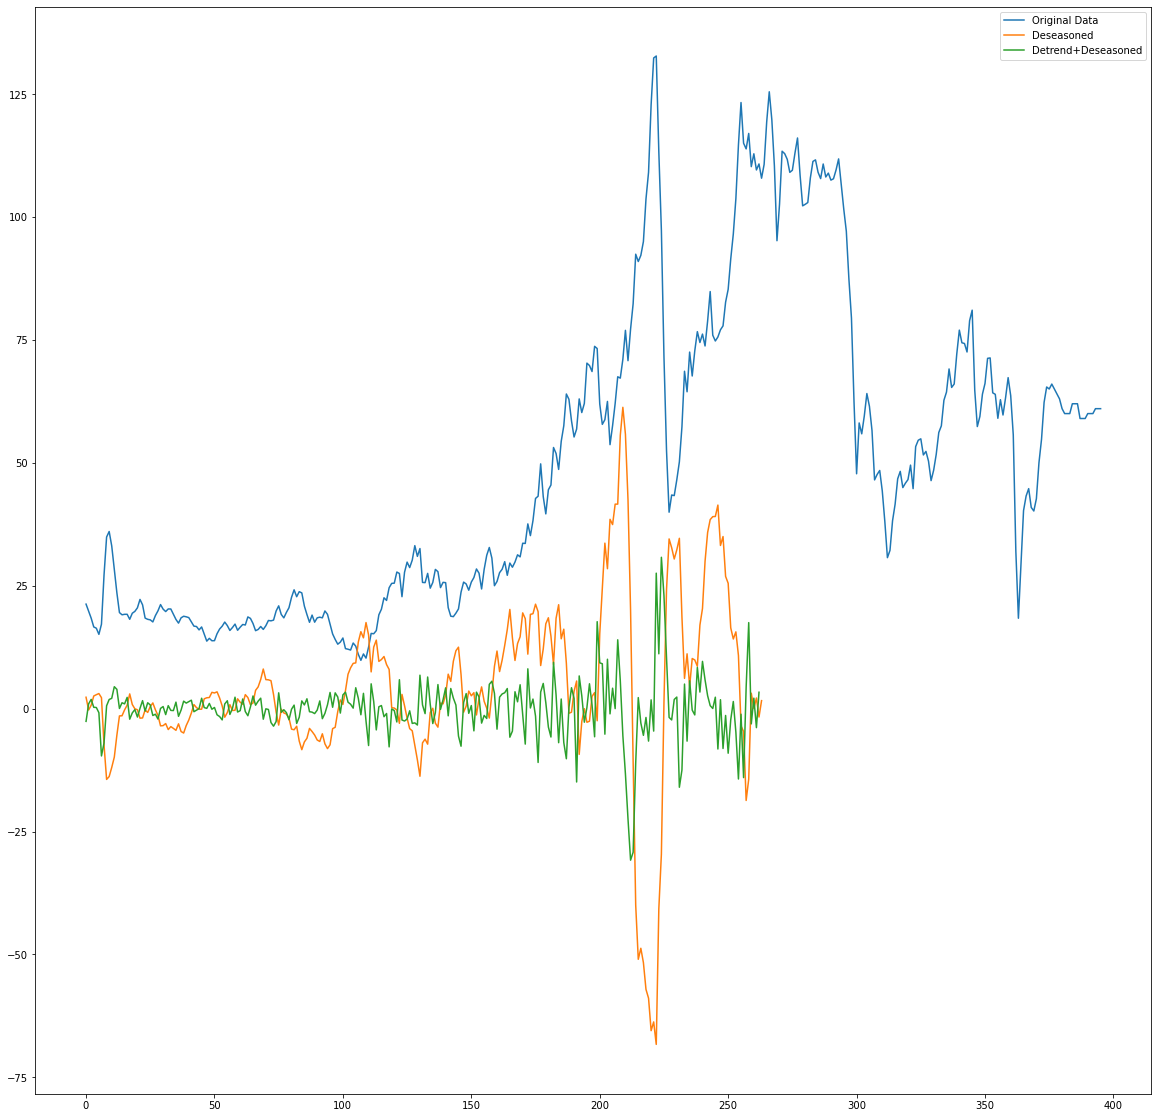

In [18]:
# De-seasonalize the data

df_final=difference(df_detrend,12)
df_deseasoned=difference(train['Price'],12)

plt.plot(data.Price.values,label='Original Data')
plt.plot(df_deseasoned, label = 'Deseasoned')
plt.plot(df_final, label = 'Detrend+Deseasoned')
plt.legend()

In [19]:
# Testing for stationarity on detrended data
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(df_final, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence accept null hypothesis, data is stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(df_final, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence reject null hypothesis, data is stationary

ADF Statistic: -5.367439601006383
p-value: 3.963488231657893e-06
Critial Values:
   1%, -3.457105309726321
Critial Values:
   5%, -2.873313676101283
Critial Values:
   10%, -2.5730443824681606

KPSS Statistic: 0.028975
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ACF and PACF Plots

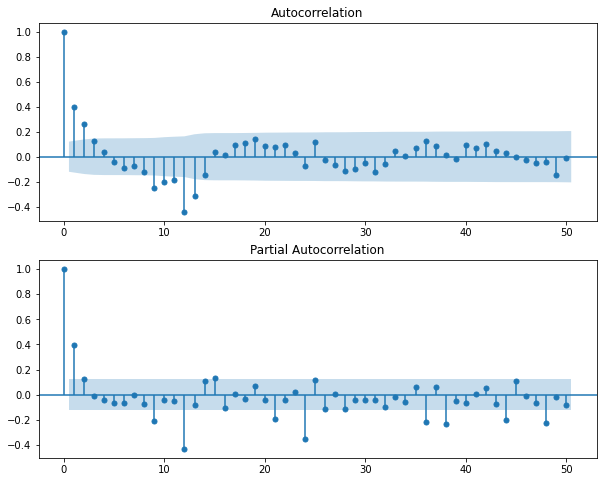

In [20]:
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df_final,lags=50,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df_final,lags=50,ax=ax2)

# ACF is gradual and PACF is sudden. Hence it is AR(p) model with p = 1 from PACF plot

# Auto ARIMA

In [21]:
import pmdarima as pm

In [22]:
myfit = pm.auto_arima(train['Price'], m=12,seasonal=True,trace=True, start_p = 0, start_q = 0, d=1,D=1,
                      error_action='ignore', # don't want to know if an order does not work
                      suppress_warnings=True, # don't want convergence warnings
                      stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1707.448, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1623.047, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1664.555, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1582.251, Time=0.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1540.916, Time=1.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1542.689, Time=3.36 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.81 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1582.934, Time=1.28 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1542.888, Time=2.44 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1542.896, Time=2.52 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1548.789, Time=1.85 sec
 ARIMA(2,1,1)(2,1,1)[12]             : 

# ARIMA

In [23]:
# With d=2 and D=1
#model=sm.tsa.arima.ARIMA(train['Price'],order=(0,2,1),seasonal_order = (2,1,1,12))
# With d=1 and D=1
model=sm.tsa.arima.ARIMA(train['Price'],order=(1,1,0),seasonal_order = (2,1,1,12))

model_res=model.fit()

print(model_res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  276
Model:             ARIMA(1, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -765.458
Date:                            Wed, 04 May 2022   AIC                           1540.916
Time:                                    12:35:48   BIC                           1558.776
Sample:                                         0   HQIC                          1548.094
                                            - 276                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4049      0.032     12.465      0.000       0.341       0.469
ar.S.L12       0.0057      0.059   

In [24]:
tspredict= model_res.predict(50)

tsforecast=model_res.forecast(120)

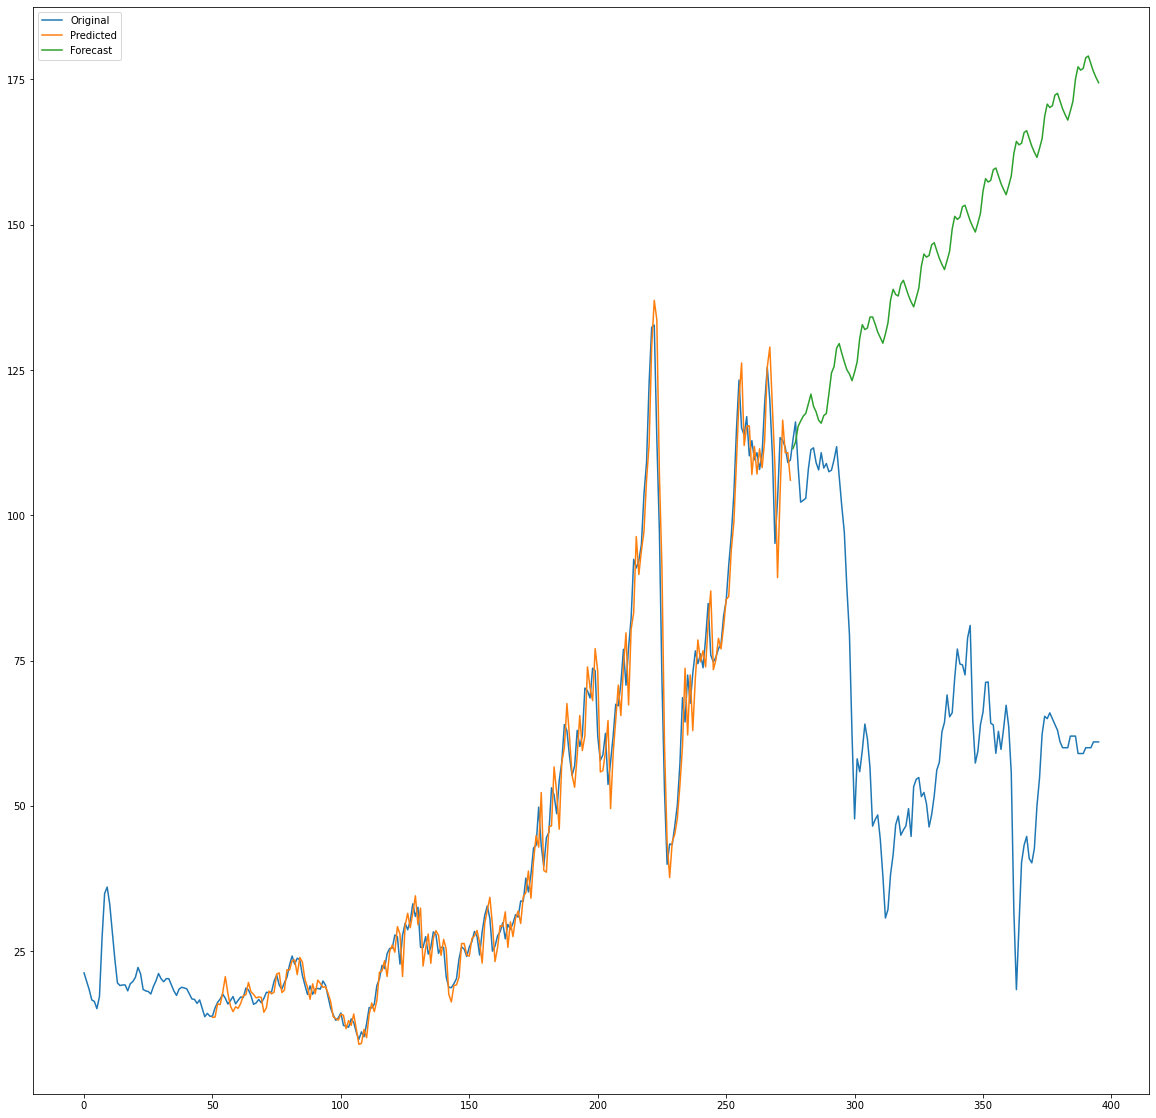

In [25]:
plt.plot(data['Price'], label='Original')
plt.plot(tspredict, label='Predicted')
plt.plot(tsforecast, label='Forecast')
plt.legend()

In [26]:
rmse = mean_squared_error(test['Price'], model_res.forecast(120), squared=False)
rmse

88.48245476918073

# Holt

In [27]:
from statsmodels.tsa.holtwinters import Holt

In [28]:
model = Holt(train['Price'], exponential=True)

result = model.fit()

C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [29]:
result.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 2.7626260391461602e-08,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 21.17108510873573,
 'initial_trend': 1.0037716665157421,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

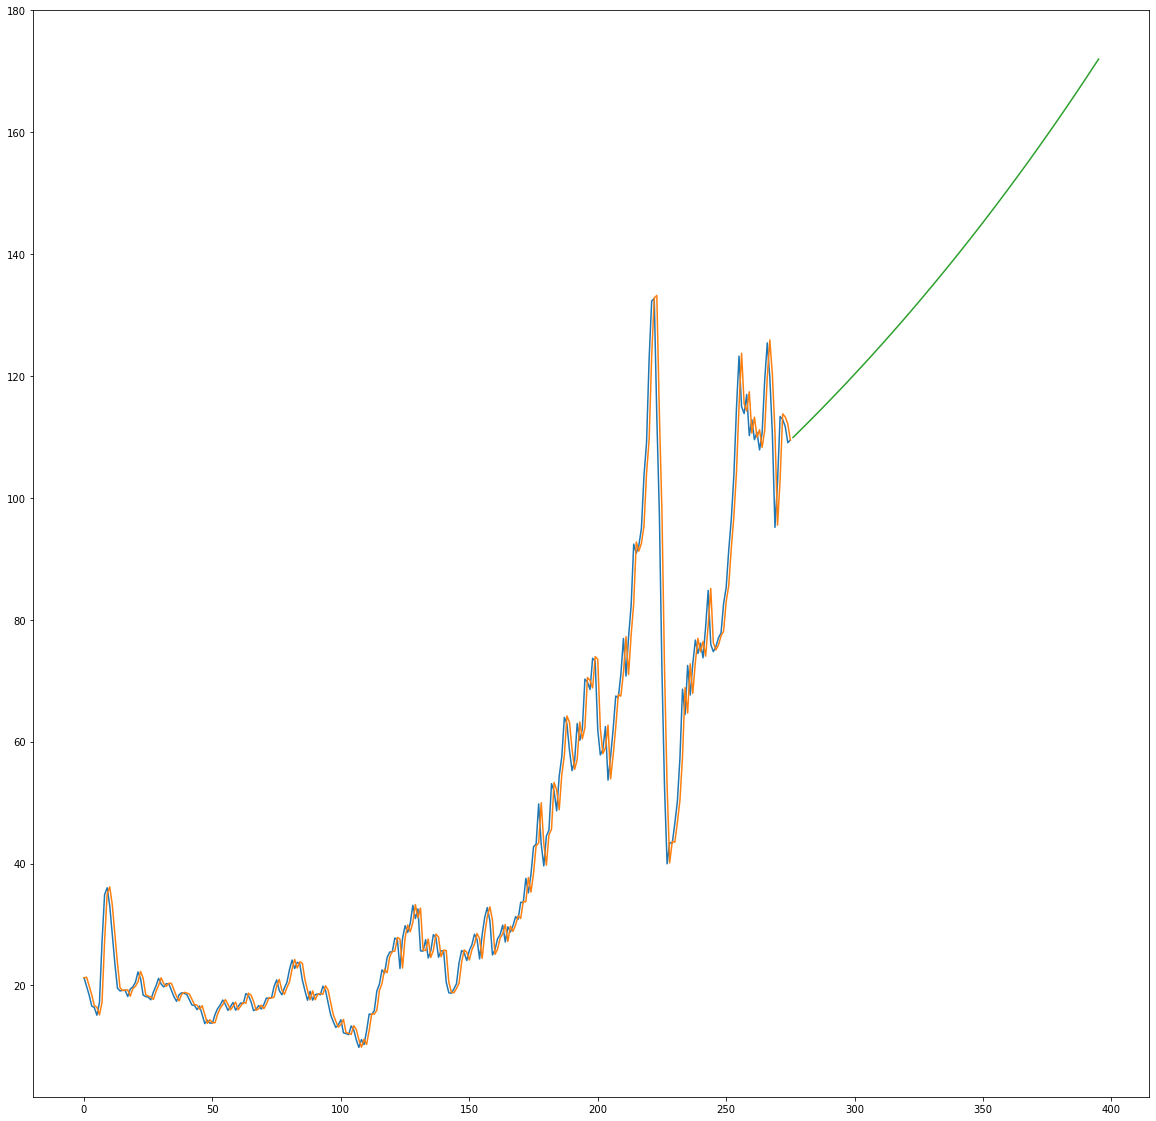

In [30]:
plt.plot(train['Price'])
plt.plot(result.fittedvalues)
plt.plot(result.forecast(120))

In [31]:
rmse = mean_squared_error(test['Price'], result.forecast(120), squared=False)
rmse

80.81454708989372

# Exponential Smoothing

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [33]:
model = ExponentialSmoothing(train['Price'], trend='multiplicative', seasonal='additive', seasonal_periods=12)

C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [34]:
result3 = model.fit()
result3.params

C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 1.8008904870712506e-11,
 'damping_trend': nan,
 'initial_level': 1062.2398335467951,
 'initial_trend': 1.000296321006091,
 'initial_seasons': array([-1041.30393182, -1040.95538992, -1039.18859107, -1038.27407823,
        -1038.41900116, -1038.50676651, -1037.576468  , -1037.25415409,
        -1037.92125632, -1038.99896932, -1040.34097196, -1041.71289577]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [35]:
print(result3.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                  276
Model:             ExponentialSmoothing   SSE                           5385.264
Optimized:                         True   AIC                            852.002
Trend:                   Multiplicative   BIC                            909.928
Seasonal:                      Additive   AICC                           854.663
Seasonal Periods:                    12   Date:                 Wed, 04 May 2022
Box-Cox:                          False   Time:                         12:35:50
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

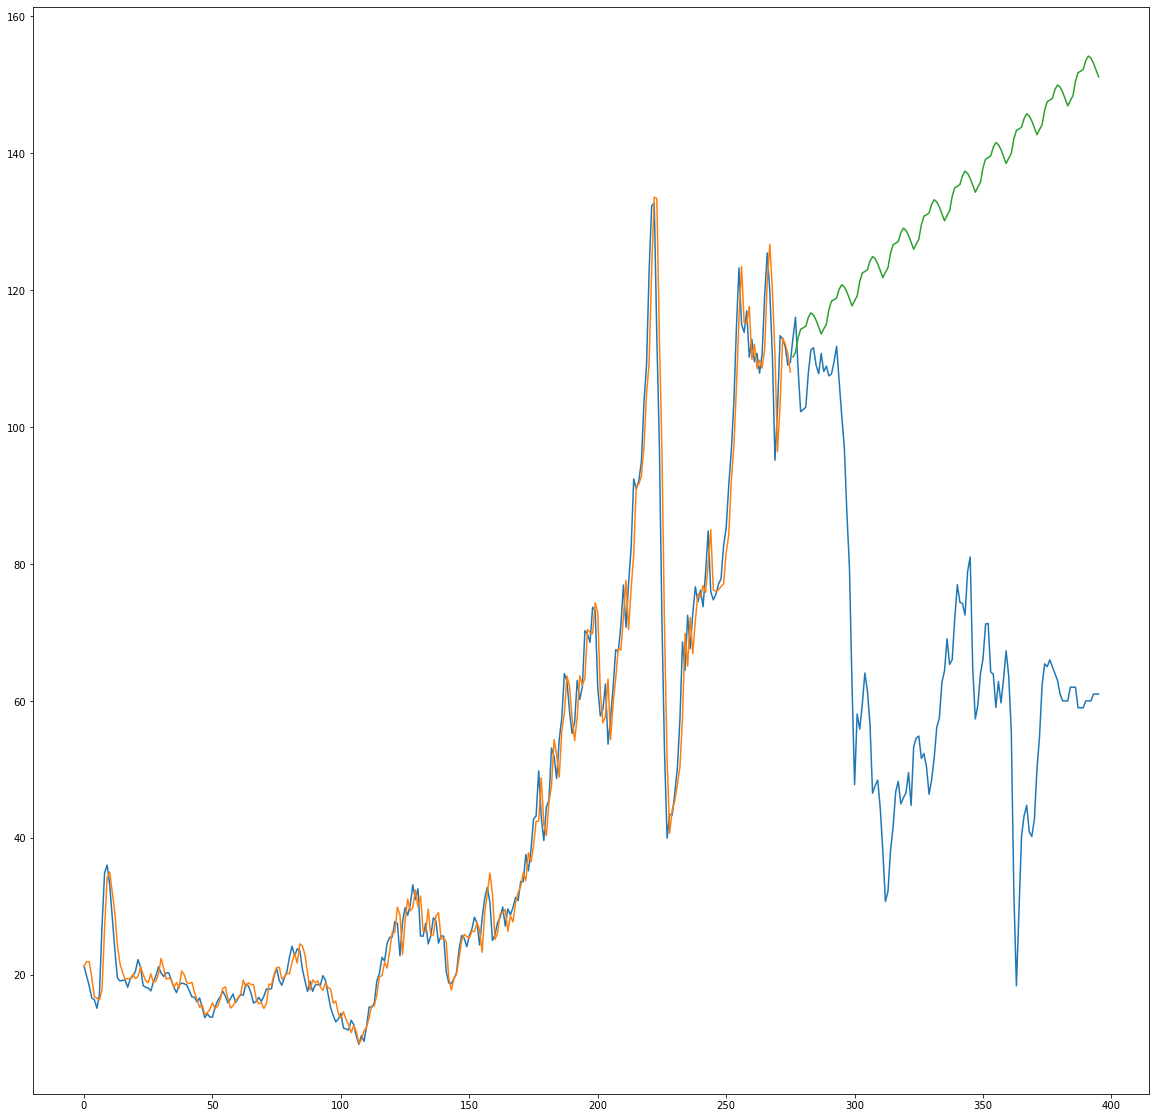

In [36]:
plt.plot(data['Price'])
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(120))

In [37]:
rmse = mean_squared_error(test['Price'], result3.forecast(120), squared=False)
rmse

73.64205594515656